Tạo file:
main.geojson
mechanical.geojson

# Test draw

Angle A: 20.803929296130985


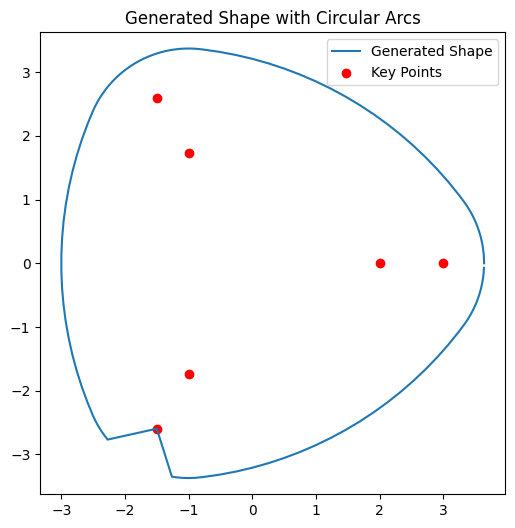

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import math

def generate_points(x, y, r):
    x_list = []
    y_list = []

    # Points A, B, C
    O = {"x": x, "y": y}
    A = {"x": x + r * np.cos(0), "y": y + r * np.sin(0)}
    B = {"x": x + r * np.cos(2 * np.pi / 3), "y": y + r * np.sin(2 * np.pi / 3)}
    C = {"x": x + r * np.cos(4 * np.pi / 3), "y": y + r * np.sin(4 * np.pi / 3)}

    # Points D, E, F (scaled by 2/3)
    D = {"x": A["x"] * 2 / 3, "y": A["y"] * 2 / 3}
    E = {"x": B["x"] * 2 / 3, "y": B["y"] * 2 / 3}
    F = {"x": C["x"] * 2 / 3, "y": C["y"] * 2 / 3}

    # Radii
    r1 = 2 * r
    r2 = 2 * r - np.sqrt(19/9 * r * r)

    #################################
    # Sub angle for conner
    AB = r2
    AC = r / 3
    angle_C = np.radians(132.5)  # Convert degrees to radians for calculation

    # Law of cosines to find BC
    # b=a·cosγ+sqrt(c^2﹣a^2×(sinγ)^2)
    BC = AC * np.cos(angle_C) + np.sqrt(AB * AB - AC * AC * np.sin(angle_C) * np.sin(angle_C))


    # Law of sines to find angle A
    # sin(A) / BC = sin(C) / AB
    # => A = arcsin(sin(C) * BC / AB)
    angle_A = np.arcsin(np.sin(angle_C) * BC / AB)
    #################################

    print("Angle A:", np.degrees(angle_A))

    # Checkpoints
    checkpoints = [11 * np.pi / 54,
                   25 * np.pi / 54,
                   47 * np.pi / 54,
                   61 * np.pi / 54,
                   4 / 3 * np.pi - angle_A,
                   4 / 3 * np.pi + angle_A,
                   83 * np.pi / 54,
                   97 * np.pi / 54,
                   108 * np.pi / 54]
    flag = 0
    once = 0
    for i in np.arange(0, 2 * np.pi, 2 * np.pi / 143):
        if flag < len(checkpoints) and i > checkpoints[flag]:
            flag += 1

        if flag == 0:
            x_list.append(D["x"] + r2 * np.cos(i))
            y_list.append(D["y"] + r2 * np.sin(i))
        elif flag == 1:
            x_list.append(C["x"] + r1 * np.cos(i))
            y_list.append(C["y"] + r1 * np.sin(i))
        elif flag == 2:
            x_list.append(E["x"] + r2 * np.cos(i))
            y_list.append(E["y"] + r2 * np.sin(i))
        elif flag == 3:
            x_list.append(A["x"] + r1 * np.cos(i))
            y_list.append(A["y"] + r1 * np.sin(i))
        elif flag == 4:
            x_list.append(F["x"] + r2 * np.cos(i))
            y_list.append(F["y"] + r2 * np.sin(i))
        elif flag == 5:
            once += 1
            if once == 1:
                i1 = checkpoints[4]
                i2 = checkpoints[5]
                T1 = {"x": F["x"] + r2 * np.cos(i1), "y": F["y"] + r2 * np.sin(i1)}
                T2 = {"x": F["x"] + r2 * np.cos(i2), "y": F["y"] + r2 * np.sin(i2)}
                x_list.append(T1["x"])
                y_list.append(T1["y"])

                for i in range(1, 4, 1):
                    x_list.append(T1["x"] + (C["x"] - T1["x"]) * i / 4)
                    y_list.append(T1["y"] + (C["y"] - T1["y"]) * i / 4)

                x_list.append(C["x"])
                y_list.append(C["y"])

                for i in range(1, 4, 1):
                    x_list.append(C["x"] + (T2["x"] - C["x"]) * i / 4)
                    y_list.append(C["y"] + (T2["y"] - C["y"]) * i / 4)

                x_list.append(T2["x"])
                y_list.append(T2["y"])
        elif flag == 6:
            x_list.append(F["x"] + r2 * np.cos(i))
            y_list.append(F["y"] + r2 * np.sin(i))
        elif flag == 7:
            x_list.append(B["x"] + r1 * np.cos(i))
            y_list.append(B["y"] + r1 * np.sin(i))
        elif flag == 8:
            x_list.append(D["x"] + r2 * np.cos(i))
            y_list.append(D["y"] + r2 * np.sin(i))

    # Plotting
    plt.figure(figsize=(6,6))
    plt.plot(x_list, y_list, label="Generated Shape")
    plt.scatter([A["x"], B["x"], C["x"], D["x"], E["x"], F["x"]],
                [A["y"], B["y"], C["y"], D["y"], E["y"], F["y"]],
                color="red", label="Key Points")
    plt.axis('equal')
    plt.title("Generated Shape with Circular Arcs")
    plt.legend()
    plt.show()

# Example usage
generate_points(0, 0, 3)


In [76]:
def generate_circle_points(r, num_points=360):
    # Define angle range with 360 points
    theta = np.linspace(0, 2 * np.pi, num_points)

    # Calculate x and y coordinates
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    z = np.zeros(num_points)  # Z-coordinates set to 0

    # Combine x, y, z into a list of lists
    circle = [[x[i], y[i], z[i]] for i in range(num_points)]

    return circle

# Added to list

In [77]:
import numpy as np
import json

# Function to generate points based on your original code
top = []
def generate_points(x, y, r):
    x_list = []

    # Points A, B, C
    O = {"x": x, "y": y}
    A = {"x": x + r * np.cos(0), "y": y + r * np.sin(0)}
    B = {"x": x + r * np.cos(2 * np.pi / 3), "y": y + r * np.sin(2 * np.pi / 3)}
    C = {"x": x + r * np.cos(4 * np.pi / 3), "y": y + r * np.sin(4 * np.pi / 3)}

    # Points D, E, F (scaled by 2/3)
    D = {"x": A["x"] * 2 / 3, "y": A["y"] * 2 / 3}
    E = {"x": B["x"] * 2 / 3, "y": B["y"] * 2 / 3}
    F = {"x": C["x"] * 2 / 3, "y": C["y"] * 2 / 3}

    # Radii
    r1 = 2 * r
    r2 = 2 * r - np.sqrt(19 / 9 * r * r)

    #################################
    # Sub angle for conner
    AB = r2
    AC = r / 3
    angle_C = np.radians(132.5)  # Convert degrees to radians for calculation

    # Law of cosines to find BC
    # b=a·cosγ+sqrt(c^2﹣a^2×(sinγ)^2)
    BC = AC * np.cos(angle_C) + np.sqrt(AB * AB - AC * AC * np.sin(angle_C) * np.sin(angle_C))


    # Law of sines to find angle A
    # sin(A) / BC = sin(C) / AB
    # => A = arcsin(sin(C) * BC / AB)
    angle_A = np.arcsin(np.sin(angle_C) * BC / AB)
    #################################

    print("Angle A:", np.degrees(angle_A))

    # Checkpoints
    checkpoints = [11 * np.pi / 54,
                   25 * np.pi / 54,
                   47 * np.pi / 54,
                   61 * np.pi / 54,
                   4 / 3 * np.pi - angle_A,
                   4 / 3 * np.pi + angle_A,
                   83 * np.pi / 54,
                   97 * np.pi / 54,
                   108 * np.pi / 54]

    flag = 0
    once = 0
    for i in np.arange(0, 2 * np.pi, 2 * np.pi / 152):
        if flag < len(checkpoints) and i > checkpoints[flag]:
            flag += 1

        if flag == 0:
            x_list.append([D["x"] + r2 * np.cos(i), D["y"] + r2 * np.sin(i), 0])
            top.append(x_list[-1])
        elif flag == 1:
            x_list.append([C["x"] + r1 * np.cos(i), C["y"] + r1 * np.sin(i), 0])
            top.append(x_list[-1])
        elif flag == 2:
            x_list.append([E["x"] + r2 * np.cos(i), E["y"] + r2 * np.sin(i), 0])
            top.append(x_list[-1])
        elif flag == 3:
            x_list.append([A["x"] + r1 * np.cos(i), A["y"] + r1 * np.sin(i), 0])
            top.append(x_list[-1])
        elif flag == 4:
            x_list.append([F["x"] + r2 * np.cos(i), F["y"] + r2 * np.sin(i), 0])
            top.append(x_list[-1])
        elif flag == 5:
            once += 1
            if once == 1:
                i1 = checkpoints[4]
                i2 = checkpoints[5]
                T1 = {"x": F["x"] + r2 * np.cos(i1), "y": F["y"] + r2 * np.sin(i1)}
                T2 = {"x": F["x"] + r2 * np.cos(i2), "y": F["y"] + r2 * np.sin(i2)}
                x_list.append([T1["x"], T1["y"], 0])
                top.append(x_list[-1])

                for i in range(1, 4, 1):
                    x_list.append([T1["x"] + (C["x"] - T1["x"]) * i / 4, T1["y"] + (C["y"] - T1["y"]) * i / 4, 0])

                x_list.append([C["x"], C["y"], 0])

                for i in range(1, 4, 1):
                    x_list.append([C["x"] + (T2["x"] - C["x"]) * i / 4, C["y"] + (T2["y"] - C["y"]) * i / 4, 0])

                x_list.append([T2["x"], T2["y"], 0])
                top.append(x_list[-1])
        elif flag == 6:
            x_list.append([F["x"] + r2 * np.cos(i), F["y"] + r2 * np.sin(i), 0])
            top.append(x_list[-1])
        elif flag == 7:
            x_list.append([B["x"] + r1 * np.cos(i), B["y"] + r1 * np.sin(i), 0])
            top.append(x_list[-1])
        elif flag == 8:
            x_list.append([D["x"] + r2 * np.cos(i), D["y"] + r2 * np.sin(i), 0])
            top.append(x_list[-1])

    # Close the polygon by adding the first point again at the end
    x_list.append(x_list[0].copy())
    top.append(x_list[0].copy())

    return x_list

# Example usage
new_coordinates = generate_points(0, 0, 0.0004)
core1 = generate_circle_points(0.0004 / 5)
core2 = generate_circle_points(0.0004 / 10)
core3 = generate_circle_points(0.0004 / 4 * 3)

Angle A: 20.80392929613099


In [78]:
len(new_coordinates)

144

In [79]:
# Original GeoJSON structure
geojson = {
	"type": "FeatureCollection",
	"features": [
		{
			"type": "Feature",
			"properties": {
				"Building name": "HA HA",
				"height": 150,
				"idb": "7"
			},
			"geometry": {
				"type": "Polygon",
				"coordinates": [
					[]  # Replace this with the new coordinates
				]
			},
			"id": "pp7"
		}
	]
}

# Replace the coordinates in the GeoJSON with the newly generated ones
geojson["features"][0]["geometry"]["coordinates"][0] = new_coordinates

# Print or export updated GeoJSON
print(json.dumps(geojson, indent=2))

{
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {
        "Building name": "HA HA",
        "height": 150,
        "idb": "7"
      },
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
            [
              0.0004854801408612435,
              0.0,
              0
            ],
            [
              0.00048529322128616726,
              9.04246118638424e-06,
              0
            ],
            [
              0.00048473278190989705,
              1.8069473479515234e-05,
              0
            ],
            [
              0.00048379978023370613,
              2.70656143803147e-05,
              0
            ],
            [
              0.00048249581027530746,
              3.601551413296031e-05,
              0
            ],
            [
              0.0004808230998455014,
              4.4903881983855674e-05,
              0
            ],
            [
              0

# Rotate & reduce function

In [80]:
# prompt: in x_list, what all the point spin in z 10 degree and move in z 5 and reduce x, y by input%

import numpy as np
import math

def rotate_and_move_points(x_list, angle_z, move_z, reduce_xy_percent):
  """Rotates points around the Z-axis and moves them along the Z-axis,
  reducing X and Y coordinates by a percentage.

  Args:
    x_list: A list of points, where each point is a list of [x, y, z] coordinates.
    angle_z: The angle of rotation around the Z-axis in degrees.
    move_z: The distance to move along the Z-axis.
    reduce_xy_percent: The percentage by which to reduce the X and Y coordinates.

  Returns:
    A new list of points with the applied transformations.
  """

  new_x_list = []
  for point in x_list:
    x, y, z = point

    # Convert angle from degrees to radians
    angle_rad = np.deg2rad(angle_z)

    # Rotate the point around the Z-axis
    new_x = x * np.cos(angle_rad) - y * np.sin(angle_rad)
    new_y = x * np.sin(angle_rad) + y * np.cos(angle_rad)

    # Reduce X and Y coordinates by the specified percentage
    new_x = new_x * (1 - reduce_xy_percent / 100)
    new_y = new_y * (1 - reduce_xy_percent / 100)

    # Move the point along the Z-axis
    new_z = z + move_z

    new_x_list.append([new_x, new_y, new_z])
  return new_x_list

new_coordinates_changed = rotate_and_move_points(new_coordinates, 60, 10, 50)

# Create base main building & other

In [81]:
# prompt: loop 128 time, take new_coordinates set as the first member of a "data" list, each loop reduce create a new member the same as the last member of "data" list, use rotate_and_move_points function to rotate z angle by 15/16 degree, move in z coordinate by 5 and reduce x, y by 55/128 percent

import numpy as np
import matplotlib.pyplot as plt
import math
import json
import copy

# ... (Your existing code for reverse_coordinates, generate_points, etc.) ...

# Assuming new_coordinates is already defined from the previous code

data = [new_coordinates]  # Initialize the data list with the original coordinates
inside = [core3]
mechanical_data = []
window_data = []
window_in_data = []
indices = [6, 7, 20, 21, 35, 36, 50, 51, 66, 67, 82, 83, 99, 100, 116, 117, 122, 123, 124, 128]
window_id = [125, 126, 127]

last_coordinates = data[-1]
last_inside = core3
for i in range(128):
    new_inside = rotate_and_move_points(
        last_inside, 15/16, 4, 55/128)
    new_coordinates_rotated_moved = rotate_and_move_points(
        last_coordinates, 15/16, 4, 55/128)
    top = rotate_and_move_points(
        top, 15/16, 4, 55/128)

    if i + 1 in indices:
        new_mechanical = rotate_and_move_points(
        last_coordinates, 15/16, 4, 55/128)
        mechanical_data.append(new_mechanical)
        """
        new_mechanical_ring = rotate_and_move_points(
        last_coordinates, 15/16, 4, -10)
        mechanical_ring.append(new_mechanical_ring)
        """
    elif i + 1 in window_id:
        window_data.append(copy.deepcopy(new_coordinates_rotated_moved))
        window_in_data.append(rotate_and_move_points(top, 0, 0, 0))
    else:
        data.append(new_coordinates_rotated_moved)



    inside.append(new_inside)
    last_inside = new_inside
    last_coordinates = new_coordinates_rotated_moved

# Now, 'data' contains a list of 128 sets of coordinates,
# each rotated and moved slightly from the previous one.

In [82]:
import copy
top_out = copy.deepcopy(mechanical_data[-1])

In [83]:
for coordinate_set in data:
    for point in coordinate_set:
        point[0] += 121.50146209183711  # Add to x-coordinate
        point[1] += 31.23558696467253  # Add to y-coordinate
for coordinate_set in mechanical_data:
    for point in coordinate_set:
        point[0] += 121.50146209183711  # Add to x-coordinate
        point[1] += 31.23558696467253  # Add to y-coordinate
"""
for coordinate_set in mechanical_ring:
    for point in coordinate_set:
        point[0] += 121.50146209183711  # Add to x-coordinate
        point[1] += 31.23558696467253  # Add to y-coordinate
"""

'\nfor coordinate_set in mechanical_ring:\n    for point in coordinate_set:\n        point[0] += 121.50146209183711  # Add to x-coordinate\n        point[1] += 31.23558696467253  # Add to y-coordinate\n'

In [84]:
# prompt: check if data[i][j][0] > 150

# ... (Your existing code) ...

for i in range(len(data)):
  for j in range(len(data[i])):
    if data[i][j][0] > 150:
      print(f"data[{i}][{j}][0] is greater than 150: {data[i][j]}")

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import math
import json

# ... (Your existing code for reverse_coordinates, generate_points, etc.) ...

# Assuming new_coordinates is already defined from the previous code

# Original GeoJSON structure
main = {
    "type": "FeatureCollection",
    "features": []
}


for i in range(len(data)):
  new_feature = {
      "type": "Feature",
      "properties": {
          "Building name": "Shanghai Tower",
          "height": 4,
          "idb": "7"
      },
      "geometry": {
          "type": "Polygon",
          "coordinates": [
              data[i]  # Replace this with the new coordinates
          ]
      },
      "id": f"part{i + 1}"
  }
  main["features"].append(new_feature)

# Now, 'data' contains a list of 128 sets of coordinates,
# each rotated and moved slightly from the previous one.

In [86]:
# prompt: export geojson

with open('main.geojson', 'w') as f:
    json.dump(main, f)


# Mechanical  layer

In [87]:
mechanical = {
    "type": "FeatureCollection",
    "features": []
}


for i in range(len(mechanical_data)):
  new_feature = {
      "type": "Feature",
      "properties": {
          "Building name": "Shanghai Tower",
          "height": 4,
          "idb": "7"
      },
      "geometry": {
          "type": "Polygon",
          "coordinates": [
              mechanical_data[i]  # Replace this with the new coordinates
          ]
      },
      "id": f"part{i + 200}"
  }
  mechanical["features"].append(new_feature)
"""
for i in range(len(mechanical_ring)):
  new_feature = {
      "type": "Feature",
      "properties": {
          "Building name": "Shanghai Tower",
          "height": 1,
          "idb": "7"
      },
      "geometry": {
          "type": "Polygon",
          "coordinates": [
              mechanical_ring[i]  # Replace this with the new coordinates
          ]
      },
      "id": f"part{i + 250}"
  }
  mechanical["features"].append(new_feature)
"""

'\nfor i in range(len(mechanical_ring)):\n  new_feature = {\n      "type": "Feature",\n      "properties": {\n          "Building name": "Shanghai Tower",\n          "height": 1,\n          "idb": "7"\n      },\n      "geometry": {\n          "type": "Polygon",\n          "coordinates": [\n              mechanical_ring[i]  # Replace this with the new coordinates\n          ]\n      },\n      "id": f"part{i + 250}"\n  }\n  mechanical["features"].append(new_feature)\n'

In [88]:
with open('mechanical.geojson', 'w') as f:
    json.dump(mechanical, f)

# Top Curve

In [89]:
top1 = rotate_and_move_points(
    top, 15/16, 4, 55/128)
top2 = rotate_and_move_points(
    top, 15/16, 4, 55/128 + 15)
top_out1 = rotate_and_move_points(
    top_out, 15/16, 4, 55/128)

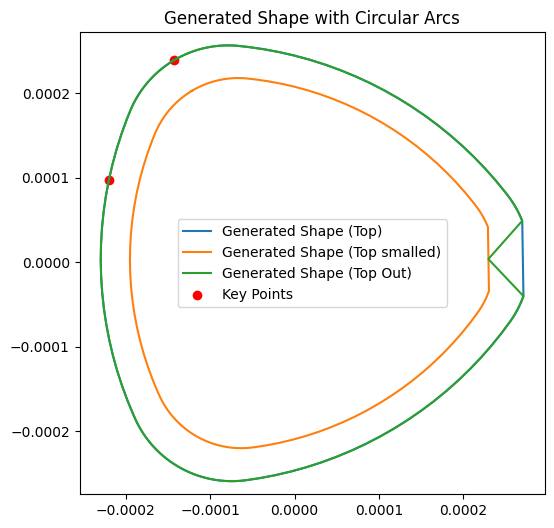

In [90]:
# Extract x and y coordinates
top_x = [point[0] for point in top1]
top_y = [point[1] for point in top1]

top_x1 = [point[0] for point in top2]
top_y1 = [point[1] for point in top2]

top_out_x = [point[0] for point in top_out1]
top_out_y = [point[1] for point in top_out1]

# Plotting
plt.figure(figsize=(6, 6))
plt.plot(top_x, top_y, label="Generated Shape (Top)")
plt.plot(top_x1, top_y1, label="Generated Shape (Top smalled)")
plt.plot(top_out_x, top_out_y, label="Generated Shape (Top Out)")
plt.scatter([top_x[0], top_x[20]],[top_y[0], top_y[20]],
                color="red", label="Key Points")
plt.axis('equal')
plt.title("Generated Shape with Circular Arcs")
plt.legend()
plt.show()

In [91]:
mul_polygon = []

## Merge topsmalled & top out to get the base

In [92]:
len(top_out1), len(top1)

(144, 137)

In [93]:
j = 0
for i in range(len(top1) - 1):
    polygon = []
    if top1[i + 1] == top_out1[j + 1]:
        polygon.append(top2[i])
        polygon.append(top2[i + 1])
        polygon.append(top_out1[j + 1])
        polygon.append(top_out1[j])
        polygon.append(top2[i])
        mul_polygon.append(copy.deepcopy(polygon))
    else:
        # first tri
        for k in range(0, 5, 1):
            polygon.append(top_out1[j + k])
        polygon.append(top2[i])
        polygon.append(top_out1[j])
        mul_polygon.append(copy.deepcopy(polygon))
        # index fix
        j += 4
        i += 1
        # second tri
        polygon = []
        for k in range(0, 5, 1):
            polygon.append(top_out1[j + k])
        polygon.append(top2[i])
        polygon.append(top_out1[j])
        mul_polygon.append(copy.deepcopy(polygon))
        # index fix
        j += 3
        i -= 1
    j += 1

In [94]:
temp = []
for polygon in mul_polygon:
    temp.append(rotate_and_move_points(polygon, 0, 0, 0))
mul_polygon = temp

In [95]:
while len(mul_polygon[0]) != 7:
    # Create a deep copy of the last polygon
    polygon = copy.deepcopy(mul_polygon[-1])

    # Add the copied polygon to the head of mul_polygon
    mul_polygon.insert(0, polygon)

    # Remove the last polygon from mul_polygon
    mul_polygon.pop()

## Copy the base and move 4 to become the top

In [96]:
top_mul_polygon = []
for polygon in mul_polygon:
    top_mul_polygon.append(rotate_and_move_points(polygon, 0, 4, 0))

In [97]:
len(top_mul_polygon)

137

In [98]:
top_mul_polygon

[[[0.00022948542192994988, 3.755281575650719e-06, 520],
  [0.000239517097370513, 1.5069135613223334e-05, 520],
  [0.0002495487728110766, 2.638298965079609e-05, 520],
  [0.0002595804482516399, 3.769684368836873e-05, 520],
  [0.0002696121236922029, 4.901069772594146e-05, 520],
  [0.0002289957817942798, 4.162736782136652e-05, 520],
  [0.00022948542192994988, 3.755281575650719e-06, 520]],
 [[0.0002289957817942798, 4.162736782136652e-05, 520],
  [0.0002274887084721337, 4.521486115464352e-05, 520],
  [0.0002678377449863597, 5.3234494726644964e-05, 520],
  [0.0002696121236922029, 4.901069772594146e-05, 520],
  [0.0002289957817942798, 4.162736782136652e-05, 520]],
 [[0.0002274887084721337, 4.521486115464352e-05, 520],
  [0.00022562474992711843, 4.9209139192138036e-05, 520],
  [0.0002656431813229676, 5.793722669781056e-05, 520],
  [0.0002678377449863597, 5.3234494726644964e-05, 520],
  [0.0002274887084721337, 4.521486115464352e-05, 520]],
 [[0.00022562474992711843, 4.9209139192138036e-05, 520],

## Copy out 6 floor

In [99]:
current_top = copy.deepcopy(top_mul_polygon)
current = copy.deepcopy(mul_polygon)
for i in range(6):
    new = []
    for polygon in current_top:
        new_polygon = rotate_and_move_points(polygon, 15/16, 4, 55/128)
        top_mul_polygon.append(copy.deepcopy(new_polygon))
        new.append(copy.deepcopy(new_polygon))
    current_top = new
    new = []
    for polygon in current:
        new_polygon = rotate_and_move_points(polygon, 15/16, 4, 55/128)
        mul_polygon.append(copy.deepcopy(new_polygon))
        new.append(copy.deepcopy(new_polygon))
    current = new

In [100]:
top_mul_polygon

[[[0.00022948542192994988, 3.755281575650719e-06, 520],
  [0.000239517097370513, 1.5069135613223334e-05, 520],
  [0.0002495487728110766, 2.638298965079609e-05, 520],
  [0.0002595804482516399, 3.769684368836873e-05, 520],
  [0.0002696121236922029, 4.901069772594146e-05, 520],
  [0.0002289957817942798, 4.162736782136652e-05, 520],
  [0.00022948542192994988, 3.755281575650719e-06, 520]],
 [[0.0002289957817942798, 4.162736782136652e-05, 520],
  [0.0002274887084721337, 4.521486115464352e-05, 520],
  [0.0002678377449863597, 5.3234494726644964e-05, 520],
  [0.0002696121236922029, 4.901069772594146e-05, 520],
  [0.0002289957817942798, 4.162736782136652e-05, 520]],
 [[0.0002274887084721337, 4.521486115464352e-05, 520],
  [0.00022562474992711843, 4.9209139192138036e-05, 520],
  [0.0002656431813229676, 5.793722669781056e-05, 520],
  [0.0002678377449863597, 5.3234494726644964e-05, 520],
  [0.0002274887084721337, 4.521486115464352e-05, 520]],
 [[0.00022562474992711843, 4.9209139192138036e-05, 520],

## Create spiral to cut the slope

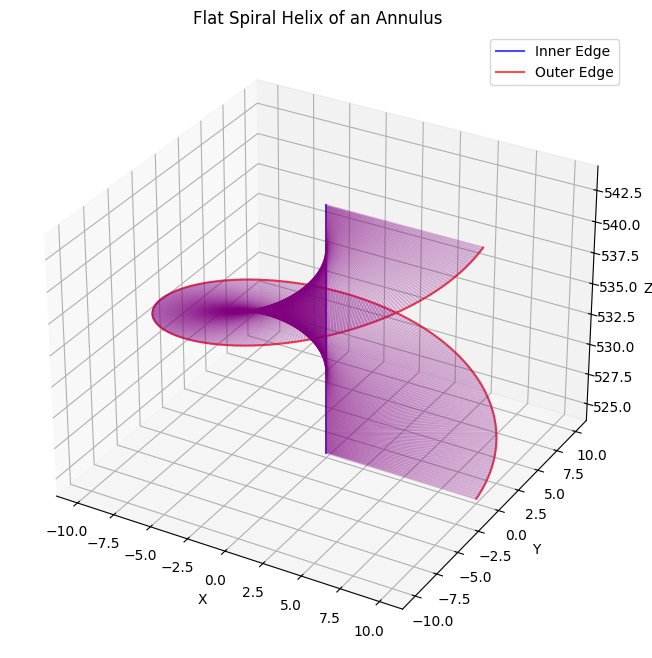

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
r_inner = 0           # Inner radius of the annulus
r_outer = 10           # Outer radius of the annulus
num_turns = 1           # Number of full turns in the spiral
points_per_turn = 361   # Number of points per turn for smoothness
height_per_turn = 20    # Vertical separation per turn

# Derived parameters
total_points = num_turns * points_per_turn  # Total number of points in the spiral
angles = np.linspace(0, 2 * np.pi * num_turns, total_points)  # Angular positions

# Heights along z-axis for each point (to be adjusted to range [528, 548])
new_min_height = 524
new_max_height = 544
z_values = np.linspace(0, height_per_turn * num_turns, total_points)

# Normalize and rescale z_values to the range [528, 548]
z_values = np.interp(z_values, (z_values.min(), z_values.max()), (new_min_height, new_max_height))

# Create figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Flat Spiral Helix of an Annulus")

# Plotting the inner and outer edges of the spiral band
x_inner = r_inner * np.cos(angles)
y_inner = r_inner * np.sin(angles)
x_outer = r_outer * np.cos(angles)
y_outer = r_outer * np.sin(angles)

# Plot inner and outer edges of the helical strip
ax.plot(x_inner, y_inner, z_values, color='blue', alpha=0.7, label='Inner Edge')
ax.plot(x_outer, y_outer, z_values, color='red', alpha=0.7, label='Outer Edge')

# Connecting the inner and outer edges to form the band
for i in range(total_points):
    ax.plot([x_inner[i], x_outer[i]], [y_inner[i], y_outer[i]], [z_values[i], z_values[i]], color='purple', alpha=0.3)

# Display the plot
plt.legend()
plt.show()


In [102]:
# List to store the planes
planes = []

# Calculate planes for each point on the spiral
for i in range(total_points - 1):
    # Position vectors
    x1, y1, z1 = x_outer[i], y_outer[i], - height_per_turn / points_per_turn / 2
    x2, y2, z2 = x_outer[i + 1], y_outer[i + 1], height_per_turn / points_per_turn / 2

    x, y, z = x_outer[i], y_outer[i], z_values[i]

    # Compute normal vector (cross product of two tangent vectors)
    normal_x = y1 * z2 - y2 * z1
    normal_y = z1 * x2 - z2 * x1
    normal_z = x1 * y2 - x2 * y1

    # Equation of the plane: ax + by + cz = d
    a, b, c = normal_x, normal_y, normal_z
    d = a * x + b * y + c * z

    planes.append((a, b, c, d))

planes[-1]

(-0.004834461616976123,
 -0.5539744307912442,
 1.7452406437283317,
 949.3622969908417)

In [103]:
# Function to calculate the section of the circle for a point (x, y)
def get_section(x, y):
    # Calculate the angle in degrees (in range [0, 360))
    angle = np.degrees(np.arctan2(y, x)) % 360

    # Each section corresponds to 3.6 degrees
    section = int(angle // 1)  # Find the section (0 to 360)

    return section

In [104]:
top1

[[-0.00014321042766053422, 0.0002389321637401095, 516],
 [-0.00014760559402249635, 0.00023617275976171477, 516],
 [-0.00015188297355210812, 0.0002332340828442968, 516],
 [-0.0001560352584181943, 0.00023012115366807497, 516],
 [-0.00016005535451171435, 0.0002268392906203275, 516],
 [-0.0001639363935659283, 0.00022339410070902125, 516],
 [-0.0001676717448907144, 0.00021979146998332575, 516],
 [-0.0001712550267009935, 0.00021603755347740448, 516],
 [-0.00017468011701990099, 0.0002121387646946375, 516],
 [-0.00017794116413808093, 0.00020810176465025837, 516],
 [-0.00018103259661123586, 0.0002039334504911255, 516],
 [-0.00018394913277884205, 0.00019964094371205726, 516],
 [-0.00018668578978778066, 0.0001952315779888799, 516],
 [-0.0001892378921054589, 0.00019071288664896646, 516],
 [-0.00019160107950787694, 0.00018609258980067258, 516],
 [-0.00019377131452900015, 0.0001813785811436594, 516],
 [-0.0001985746372332596, 0.00016951181936981493, 516],
 [-0.0002050588551739044, 0.0001516806523157

In [105]:
save_window_indices = []
section_start = [30, 150, 270]
section_end = [90, 210, 330]
for index in range(len(top1)):
    point = top1[index]
    temp = get_section(point[0], point[1])
    for i in range(len(section_start)):
        if temp >= section_start[i] and temp <= section_end[i]:
            save_window_indices.append(index)
save_window_indices

[19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117]

In [106]:
mul_polygon[0][0]

[0.00022948542192994988, 3.755281575650719e-06, 516]

In [107]:
remove_id = []
for index in range(len(top_mul_polygon) - 1):
    top_points = top_mul_polygon[index]
    bottom_points = mul_polygon[index]
    count = 0
    if len(top_mul_polygon[index]) == len(top_mul_polygon[index + 1]) and len(top_mul_polygon[index]) == 7:
        continue
    for i in range(len(top_points)):
        sec_top = get_section(top_points[i][0], top_points[i][1])
        if planes[sec_top][0] * top_points[i][0] + \
                planes[sec_top][1] * top_points[i][1] + \
                planes[sec_top][2] * top_points[i][2] - \
                planes[sec_top][3] > 0:
            top_points[i][2] = (
                - planes[sec_top][0] * top_points[i][0] +
                - planes[sec_top][1] * top_points[i][1] +
                planes[sec_top][3] ) / planes[sec_top][2]
        sec_bot = get_section(bottom_points[i][0], bottom_points[i][1])
        if planes[sec_bot][0] * bottom_points[i][0] + \
                planes[sec_bot][1] * bottom_points[i][1] + \
                planes[sec_bot][2] * bottom_points[i][2] - \
                planes[sec_bot][3] > 0:
            bottom_points[i][2] = (
                - planes[sec_bot][0] * bottom_points[i][0] + \
                - planes[sec_bot][1] * bottom_points[i][1] + \
                + planes[sec_bot][3] ) / planes[sec_bot][2]
            count += 1
    if count >= len(bottom_points):
        remove_id.append(index)

In [108]:
remove_id

[411,
 412,
 413,
 414,
 415,
 416,
 417,
 418,
 419,
 420,
 421,
 422,
 423,
 424,
 425,
 426,
 427,
 428,
 429,
 548,
 549,
 550,
 551,
 552,
 553,
 554,
 555,
 556,
 557,
 558,
 559,
 560,
 561,
 562,
 563,
 564,
 565,
 566,
 567,
 568,
 569,
 570,
 571,
 572,
 573,
 574,
 575,
 576,
 577,
 578,
 579,
 580,
 581,
 582,
 583,
 584,
 585,
 586,
 587,
 588,
 589,
 590,
 591,
 592,
 593,
 594,
 595,
 596,
 597,
 598,
 599,
 600,
 601,
 602,
 603,
 604,
 605,
 606,
 685,
 686,
 687,
 688,
 689,
 690,
 691,
 692,
 693,
 694,
 695,
 696,
 697,
 698,
 699,
 700,
 701,
 702,
 703,
 704,
 705,
 706,
 707,
 708,
 709,
 710,
 711,
 712,
 713,
 714,
 715,
 716,
 717,
 718,
 719,
 720,
 721,
 722,
 723,
 724,
 725,
 726,
 727,
 728,
 729,
 730,
 731,
 732,
 733,
 734,
 735,
 736,
 737,
 738,
 739,
 740,
 741,
 742,
 743,
 744,
 745,
 746,
 747,
 748,
 749,
 750,
 751,
 752,
 753,
 754,
 755,
 756,
 757,
 758,
 822,
 823,
 824,
 825,
 826,
 827,
 828,
 829,
 830,
 831,
 832,
 833,
 834,
 835,
 836

In [109]:
# Sort the indices in descending order
remove_id = sorted(remove_id, reverse=True)

# Remove the elements at the specified indices
for index in remove_id:
    if 0 <= index < len(top_mul_polygon):  # Ensure the index is within the valid range
        del top_mul_polygon[index]

for index in remove_id:
    if 0 <= index < len(mul_polygon):  # Ensure the index is within the valid range
        del mul_polygon[index]

In [110]:
for coordinate_set in top_mul_polygon:
    for point in coordinate_set:
        point[0] += 121.50146209183711  # Add to x-coordinate
        point[1] += 31.23558696467253  # Add to y-coordinate

for coordinate_set in mul_polygon:
    for point in coordinate_set:
        point[0] += 121.50146209183711  # Add to x-coordinate
        point[1] += 31.23558696467253  # Add to y-coordinate

In [111]:
for coordinate_set in mul_polygon:
    for point in coordinate_set:
        if point[0] < 120 or point[0] > 122:
            print(coordinate_set)
for coordinate_set in top_mul_polygon:
    for point in coordinate_set:
        if point[0] < 120 or point[0] > 122:
            print(coordinate_set)

In [112]:
mul_polygon

[[[121.50169157725904, 31.235590719954107, 516],
  [121.50170160893448, 31.235602033808146, 516],
  [121.50171164060993, 31.235613347662184, 516],
  [121.50172167228537, 31.23562466151622, 516],
  [121.5017317039608, 31.235635975370258, 516],
  [121.50169108761891, 31.235628592040353, 516],
  [121.50169157725904, 31.235590719954107, 516]],
 [[121.50169108761891, 31.235628592040353, 516],
  [121.50168958054559, 31.235632179533685, 516],
  [121.5017299295821, 31.235640199167257, 516],
  [121.5017317039608, 31.235635975370258, 516],
  [121.50169108761891, 31.235628592040353, 516]],
 [[121.50168958054559, 31.235632179533685, 516],
  [121.50168771658704, 31.235636173811724, 516],
  [121.50172773501843, 31.235644901899228, 516],
  [121.5017299295821, 31.235640199167257, 516],
  [121.50168958054559, 31.235632179533685, 516]],
 [[121.50168771658704, 31.235636173811724, 516],
  [121.50168568915733, 31.235640087649642, 516],
  [121.50172534798918, 31.235649509923643, 516],
  [121.50172773501843,

In [113]:
mul_polygon[-24]

[[121.50168875095319, 31.23556982419644, 536],
 [121.50168939754415, 31.235572104703504, 536],
 [121.50172971412222, 31.235569469032324, 536],
 [121.50172895284723, 31.23556678403809, 536],
 [121.50168875095319, 31.23556982419644, 536]]

In [114]:
import json

# Create GeoJSON structure for multiple 3D Cubes
features = []

# Loop through each pair of top and bottom polygons
for index in range(len(top_mul_polygon)):
    top_points = top_mul_polygon[index]
    bottom_points = mul_polygon[index]

    # Create Top and Bottom polygons
    top_polygon = {
        "type": "Feature",
        "geometry": {
            "type": "Polygon",
            "coordinates": [top_points]
        },
        "properties": {
            "name": f"Top Face {index + 1}"
        }
    }

    bottom_polygon = {
        "type": "Feature",
        "geometry": {
            "type": "Polygon",
            "coordinates": [bottom_points]
        },
        "properties": {
            "name": f"Bottom Face {index + 1}"
        }
    }

    features.append(top_polygon)
    features.append(bottom_polygon)

    # Connecting the top and bottom faces with polygons (for cube sides)
    s = 0
    if len(top_points) == 7:
        s = index % 2
    for i in range(s, len(top_points), 2):
        top = top_points[i]
        bottom = bottom_points[i]

        # Create side face as a polygon (4 sides)
        """
        side_polygon = {
            "type": "Feature",
            "geometry": {
                "type": "Polygon",
                "coordinates": [
                    [
                        top,
                        bottom,
                        bottom_points[(i + 1) % len(bottom_points)],
                        top_points[(i + 1) % len(top_points)]
                    ]
                ]
            },
            "properties": {
                "name": f"Side Face {index + 1} - Face {i + 1}"
            }
        }
        features.append(side_polygon)
        """

# Create GeoJSON object
geojson = {
    "type": "FeatureCollection",
    "features": features
}

# Save GeoJSON to a file
with open('top_curve.geojson', 'w') as f:
    json.dump(geojson, f)

print("GeoJSON for multiple cubes created successfully!")

GeoJSON for multiple cubes created successfully!


# Top object

In [115]:
core1.append(copy.deepcopy(core1[-1]))
core2_reversed = list(reversed(core2))
core1.extend(copy.deepcopy(core2_reversed))
core1.append(copy.deepcopy(core1[-1]))
core1.append(copy.deepcopy(core1[0]))

In [116]:
z = mechanical_data[-1][0][2] + 2

In [117]:
for point in core1:
    point[0] += 121.50146209183711  # Add to x-coordinate
    point[1] += 31.23558696467253  # Add to y-coordinate
    point[2] = z

In [118]:
core1

[[121.50154209183711, 31.23558696467253, 514],
 [121.50154207958475, 31.235588364753767, 514],
 [121.50154204283143, 31.235589764406143, 514],
 [121.50154198158839, 31.235591163200937, 514],
 [121.50154189587441, 31.23559256070968, 514],
 [121.50154178571573, 31.23559395650431, 514],
 [121.5015416511461, 31.23559535015728, 514],
 [121.50154149220673, 31.235596741241697, 514],
 [121.50154130894632, 31.235598129331468, 514],
 [121.501541101421, 31.2355995140014, 514],
 [121.50154086969432, 31.23560089482736, 514],
 [121.50154061383728, 31.235602271386387, 514],
 [121.50154033392825, 31.23560364325683, 514],
 [121.50154003005296, 31.235605010018475, 514],
 [121.5015397023045, 31.23560637125267, 514],
 [121.50153935078325, 31.235607726542447, 514],
 [121.50153897559689, 31.235609075472684, 514],
 [121.50153857686034, 31.23561041763018, 514],
 [121.50153815469574, 31.235611752603827, 514],
 [121.5015377092324, 31.235613079984706, 514],
 [121.50153724060678, 31.235614399366227, 514],
 [121.5

In [119]:
top_obj = {
    "type": "FeatureCollection",
    "features": []
}

new_feature = {
    "type": "Feature",
    "properties": {
        "Building name": "Shanghai Tower",
        "height": 4,
        "idb": "7"
    },
    "geometry": {
        "type": "Polygon",
        "coordinates": [
            core1  # Replace this with the new coordinates
        ]
    },
    "id": f"part{300}"
}
top_obj["features"].append(new_feature)

In [120]:
with open('top_obj.geojson', 'w') as f:
    json.dump(top_obj, f)

In [121]:
top_obj

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'Building name': 'Shanghai Tower', 'height': 4, 'idb': '7'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[121.50154209183711, 31.23558696467253, 514],
      [121.50154207958475, 31.235588364753767, 514],
      [121.50154204283143, 31.235589764406143, 514],
      [121.50154198158839, 31.235591163200937, 514],
      [121.50154189587441, 31.23559256070968, 514],
      [121.50154178571573, 31.23559395650431, 514],
      [121.5015416511461, 31.23559535015728, 514],
      [121.50154149220673, 31.235596741241697, 514],
      [121.50154130894632, 31.235598129331468, 514],
      [121.501541101421, 31.2355995140014, 514],
      [121.50154086969432, 31.23560089482736, 514],
      [121.50154061383728, 31.235602271386387, 514],
      [121.50154033392825, 31.23560364325683, 514],
      [121.50154003005296, 31.235605010018475, 514],
      [121.5015397023045, 31.23560637125267, 514],
      [121.50153935078325

# Inside structure

In [122]:
for coordinate_set in inside:
    for point in coordinate_set:
        point[0] += 121.50146209183711  # Add to x-coordinate
        point[1] += 31.23558696467253  # Add to y-coordinate

In [123]:
inside

[[[121.50176209183711, 31.23558696467253, 0.0],
  [121.50176204589076, 31.23559221497716, 0.0],
  [121.50176190806579, 31.23559746367357, 0.0],
  [121.5017616784044, 31.235602709154044, 0.0],
  [121.50176135697696, 31.235607949811843, 0.0],
  [121.5017609438819, 31.235613184041704, 0.0],
  [121.50176043924579, 31.235618410240335, 0.0],
  [121.50175984322317, 31.235623626806905, 0.0],
  [121.50175915599664, 31.235628832143536, 0.0],
  [121.50175837777667, 31.235634024655784, 0.0],
  [121.50175750880165, 31.235639202753134, 0.0],
  [121.50175654933776, 31.235644364849488, 0.0],
  [121.50175549967888, 31.235649509363654, 0.0],
  [121.50175436014655, 31.23565463471982, 0.0],
  [121.5017531310898, 31.23565973934804, 0.0],
  [121.5017518128851, 31.235664821684722, 0.0],
  [121.50175040593626, 31.2356698801731, 0.0],
  [121.5017489106742, 31.235674913263715, 0.0],
  [121.50174732755696, 31.235679919414885, 0.0],
  [121.50174565706943, 31.23568489709318, 0.0],
  [121.50174389972335, 31.2356898

In [124]:
inside_geo = {
    "type": "FeatureCollection",
    "features": []
}


for i in range(len(inside)):
  new_feature = {
      "type": "Feature",
      "properties": {
          "Building name": "Shanghai Tower",
          "height": 4,
          "idb": "7"
      },
      "geometry": {
          "type": "Polygon",
          "coordinates": [
              inside[i]  # Replace this with the new coordinates
          ]
      },
      "id": f"part{i + 1}"
  }
  inside_geo["features"].append(new_feature)

In [125]:
with open('inside.geojson', 'w') as f:
    json.dump(inside_geo, f)

# Window layer

In [126]:
window_in_data_1 = []
for poly in window_in_data:
    window_in_data_1.append(rotate_and_move_points(poly, 0, 0, 15))

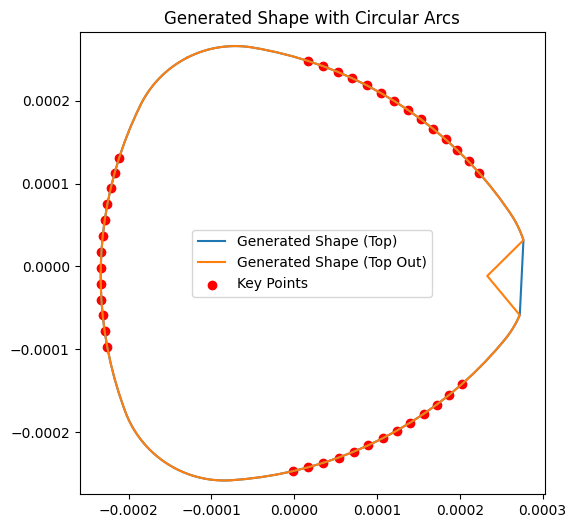

In [127]:
# Extract x and y coordinates
top_x = [point[0] for point in window_in_data[0]]
top_y = [point[1] for point in window_in_data[0]]

top_out_x = [point[0] for point in window_data[0]]
top_out_y = [point[1] for point in window_data[0]]

# Plotting
plt.figure(figsize=(6, 6))
plt.plot(top_x, top_y, label="Generated Shape (Top)")
plt.plot(top_out_x, top_out_y, label="Generated Shape (Top Out)")
plt.scatter([top_x[i] for i in save_window_indices],
            [top_y[i] for i in save_window_indices],
                color="red", label="Key Points")
plt.axis('equal')
plt.title("Generated Shape with Circular Arcs")
plt.legend()
plt.show()

In [128]:
window_poly = []
non_window_poly = []

In [129]:
for h in range(len(window_in_data)):
    j = 0
    for i in range(len(window_in_data[h]) - 1):
        polygon = []
        if window_in_data[h][i + 1] == window_data[h][j + 1]:
            polygon.append(window_in_data_1[h][i])
            polygon.append(window_in_data_1[h][i + 1])
            polygon.append(window_data[h][j + 1])
            polygon.append(window_data[h][j])
            polygon.append(window_in_data_1[h][i])
            if i in save_window_indices:
                window_poly.append(copy.deepcopy(polygon))
            else:
                non_window_poly.append(copy.deepcopy(polygon))
        else:
            # first tri
            for k in range(0, 5, 1):
                polygon.append(window_data[h][j + k])
            polygon.append(window_in_data_1[h][i])
            polygon.append(window_data[h][j])
            if i in save_window_indices:
                window_poly.append(copy.deepcopy(polygon))
            else:
                non_window_poly.append(copy.deepcopy(polygon))

            # index fix
            j += 4
            i += 1
            # second tri
            polygon = []
            for k in range(0, 5, 1):
                polygon.append(window_data[h][j + k])
            polygon.append(window_in_data_1[h][i])
            polygon.append(window_data[h][j])
            if i in save_window_indices:
                window_poly.append(copy.deepcopy(polygon))
            else:
                non_window_poly.append(copy.deepcopy(polygon))
            # index fix
            j += 3
            i -= 1
        j += 1

In [130]:
for coordinate_set in window_poly:
    for point in coordinate_set:
        if point[0] < 120:
            point[0] += 121.50146209183711  # Add to x-coordinate
        if point[1] < 30:
            point[1] += 31.23558696467253  # Add to y-coordinate
for coordinate_set in non_window_poly:
    for point in coordinate_set:
        if point[0] < 120:
            point[0] += 121.50146209183711  # Add to x-coordinate
        if point[1] < 30:
            point[1] += 31.23558696467253  # Add to y-coordinate

In [131]:
non_window_poly

[[[121.50135202689574, 31.235801242860816, 500],
  [121.50134807816798, 31.235799110310666, 500],
  [121.50132795810872, 31.23583654777622, 500],
  [121.50133260367079, 31.23583905665875, 500],
  [121.50135202689574, 31.235801242860816, 500]],
 [[121.50134807816798, 31.235799110310666, 500],
  [121.50134422094096, 31.235796816401155, 500],
  [121.5013234201946, 31.235833849059144, 500],
  [121.50132795810872, 31.23583654777622, 500],
  [121.50134807816798, 31.235799110310666, 500]],
 [[121.50134422094096, 31.235796816401155, 500],
  [121.50134046180472, 31.235794365051387, 500],
  [121.50131899768135, 31.235830965118247, 500],
  [121.5013234201946, 31.235833849059144, 500],
  [121.50134422094096, 31.235796816401155, 500]],
 [[121.50134046180472, 31.235794365051387, 500],
  [121.50133680718163, 31.23579176044946, 500],
  [121.50131469812479, 31.23582790088068, 500],
  [121.50131899768135, 31.235830965118247, 500],
  [121.50134046180472, 31.235794365051387, 500]],
 [[121.50133680718163, 

In [132]:
for coordinate_set in window_poly:
    for point in coordinate_set:
        if point[0] < 120 or point[0] > 122:
            print(coordinate_set)
for coordinate_set in non_window_poly:
    for point in coordinate_set:
        if point[0] < 120 or point[0] > 122:
            print(coordinate_set)

In [133]:
window_geo = {
    "type": "FeatureCollection",
    "features": []
}


for i in range(len(window_poly)):
  new_feature = {
      "type": "Feature",
      "properties": {
          "Building name": "Shanghai Tower",
          "height": 4,
          "idb": "7"
      },
      "geometry": {
          "type": "Polygon",
          "coordinates": [
              window_poly[i]  # Replace this with the new coordinates
          ]
      },
      "id": f"part{1000 + i}"
  }
  window_geo["features"].append(new_feature)

In [134]:
with open('window_geo.geojson', 'w') as f:
    json.dump(window_geo, f)

In [135]:
non_window_geo = {
    "type": "FeatureCollection",
    "features": []
}


for i in range(len(non_window_poly)):
  new_feature = {
      "type": "Feature",
      "properties": {
          "Building name": "Shanghai Tower",
          "height": 4,
          "idb": "7"
      },
      "geometry": {
          "type": "Polygon",
          "coordinates": [
              non_window_poly[i]  # Replace this with the new coordinates
          ]
      },
      "id": f"part{1100 + i}"
  }
  non_window_geo["features"].append(new_feature)

In [136]:
with open('non_window_geo.geojson', 'w') as f:
    json.dump(non_window_geo, f)